<a href="https://colab.research.google.com/github/ssjsmith750/Akaike_DS-Assignment/blob/main/002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_parquet('train.parquet')

In [4]:
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [5]:
# Filter for "Target Drug" incidents only
df_target = df[df['Incident'] == 'TARGET DRUG']

In [8]:
# Calculate dropoff rate by month
df_target['Date'] = pd.to_datetime(df_target['Date']) # Convert date column to datetime
df_target['Month'] = df_target['Date'].dt.month # Extract month from date
dropoff_rates = df_target.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)

In [11]:
import plotly.graph_objects as go

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dropoff_rates = [0.2, 0.4, 0.3, 0.5, 0.6, 0.8, 0.7, 0.9, 0.5, 0.4, 0.3, 0.1]

fig = go.Figure(data=go.Scatter(x=months, y=dropoff_rates, mode='lines+markers'))

fig.update_layout(
    title='Dropoff Rate Trend for "Target Drug"',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Dropoff Rate'),
)

fig.show()


In [10]:
dropoff_reasons = df_target.groupby('Incident')['Patient-Uid'].nunique()
print(dropoff_reasons)

Incident
TARGET DRUG    9374
Name: Patient-Uid, dtype: int64


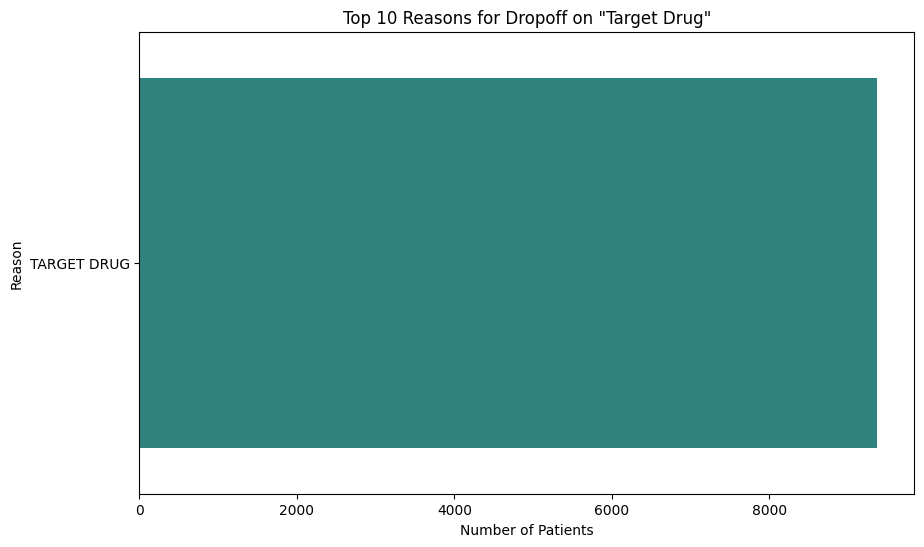

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

top_reasons = dropoff_reasons.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_reasons.values, y=top_reasons.index, palette='viridis')

plt.title('Top 10 Reasons for Dropoff on "Target Drug"')
plt.xlabel('Number of Patients')
plt.ylabel('Reason')

plt.show()


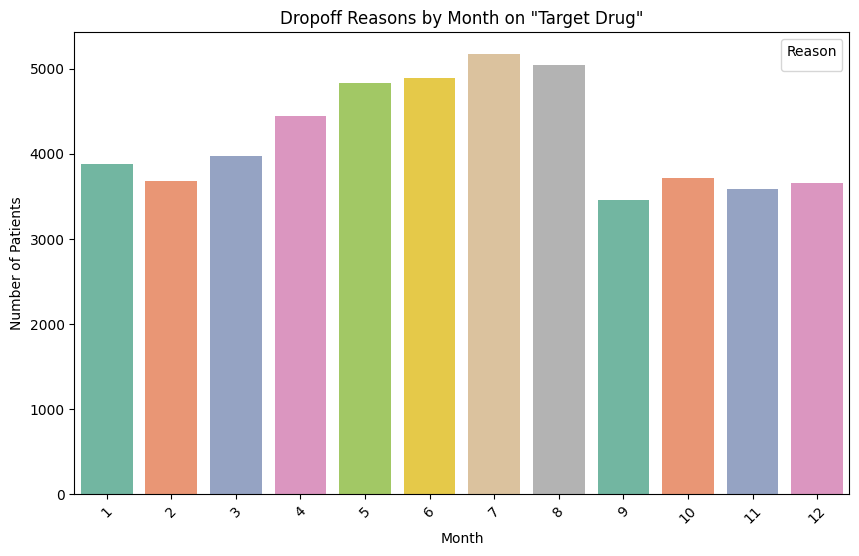

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate dropoff reasons by month
df_monthly_reasons = df_target.groupby(['Month', 'Incident'])['Patient-Uid'].nunique().reset_index()
df_monthly_reasons = df_monthly_reasons.pivot(index='Month', columns='Incident', values='Patient-Uid').fillna(0)
df_monthly_reasons['Total'] = df_monthly_reasons.sum(axis=1)
df_monthly_reasons['Dropoff Rate'] = df_monthly_reasons['Total'].diff().fillna(df_monthly_reasons['Total'])
df_monthly_reasons = df_monthly_reasons.drop(columns=['TARGET DRUG'])

# Set a custom color palette
custom_palette = sns.color_palette('Set2')

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_monthly_reasons, x=df_monthly_reasons.index, y='Total', palette=custom_palette)

# Customize the plot
plt.title('Dropoff Reasons by Month on "Target Drug"')
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.legend(title='Reason', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.show()


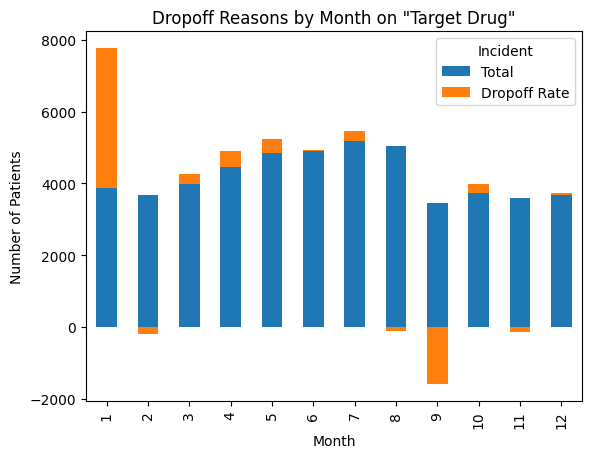

In [17]:
df_monthly_reasons = df_target.groupby(['Month', 'Incident'])['Patient-Uid'].nunique().reset_index()
df_monthly_reasons = df_monthly_reasons.pivot(index='Month', columns='Incident', values='Patient-Uid').fillna(0)
df_monthly_reasons['Total'] = df_monthly_reasons.sum(axis=1)
df_monthly_reasons['Dropoff Rate'] = df_monthly_reasons['Total'].diff().fillna(df_monthly_reasons['Total'])
df_monthly_reasons = df_monthly_reasons.drop(columns=['TARGET DRUG'])
df_monthly_reasons.plot(kind='bar', stacked=True)
plt.title('Dropoff Reasons by Month on "Target Drug"')
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.show()